# Clase Práctica 07

# CNN - Redes Neuronales Convolucionales

# Mejorar el desempeño de los modelos usando aumento de imágenes


Cuando no se cuenta con datos disponibles que sean suficientes, el aumento de imágenes se vuelve fundamental cuando se trabaja con redes neuronales y modelos de aprendizaje profundo. 

Este clase práctica se muestra cómo usar la preparación de datos y el aumento de datos con su base de datos de imágenes, para entrenar y evaluar modelos de aprendizaje profundo en Python con Keras.

#  Aumento de Datos (Image Augmentation) con Keras

Al igual que el resto de Keras, el aumento de imágenes es simple y potente. Keras proporciona la clase ImageDataGenerator que define la configuración para la preparación y el aumento de datos de imágenes. Esto incluye capacidades tales como:

1. Caracterización en cuanto a características.
2. Blanqueamiento ZCA.
3. Rotación aleatoria, desplazamientos, corte, etc.
4. Dimensión reordenada.
5. Guarda las imágenes aumentadas en el disco.

Un generador de imágenes aumentadas se puede crear de la siguiente manera:

datagen = ImageDataGenerator()

En lugar de realizar las operaciones en su conjunto de datos en la memoria, la API está diseñada para ser usada en el proceso de entrenamiento del modelo de aprendizaje profundo, creando datos aumentados de manera online. Esto reduce la sobrecarga de memoria pero agrega un costo de tiempo adicional durante el entrenamiento del modelo. Una vez que haya creado y configurado su ImageDataGenerator debe ajustarlo en sus datos. Esto calculará las estadísticas necesarias para realizar las transformaciones a los datos de su imagen. Puede hacerlo llamando a la función de ajuste fit() en el generador de datos y pasando su base de datos de entrenamiento.

datagen.fit(train)

El generador de datos en sí es de hecho un iterador, devolviendo lotes de muestras de imágenes cuando se solicitan. Podemos configurar el tamaño del lote y preparar el generador de datos y obtener lotes de imágenes llamando a la función flow().

X_batch, y_batch = datagen.flow(train, train, batch_size=32)

Finalmente podemos hacer uso del generador de datos. En lugar de llamar a la función de ajuste() en nuestro modelo, debemos llamar a la función de ajuste del generador (fit_generator) y pasar el generador de datos, así como el número total de épocas para entrenar.

fit_generator(datagen, samples_per_epoch=len(train), nb_epoch=100)

Note que es importante el uso del formato de datos para luego poder guardar sus imágenes de manera correcta. 

El formato "th" significa que los núcleos convolucionales tendrán la forma (profundidad, entrada, profundidad, filas, columnas). El formato "tf" significa que los núcleos convolucionales tendrán la forma (filas, columnas, entrada, profundidad, profundidad)

#  Cargando los datos 

Ahora que sabe cómo funciona la API de aumento de imagen en Keras, veamos algunos ejemplos. Utilizaremos la base MNIST en estos ejemplos. Para comenzar, echemos un vistazo a las primeras 9 imágenes en el conjunto de datos de entrenamiento.

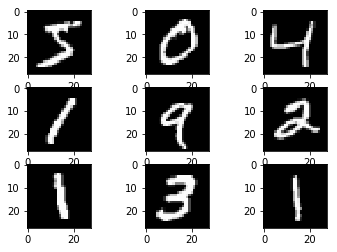

In [103]:
from keras.datasets import mnist
from matplotlib import pyplot
# cargar datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# mostrar
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()


#  Estandarizando las características

También es posible estandarizar los valores de píxeles en todo el conjunto de datos. Esto se denomina estandarización de las características (feature standardization) y refleja el tipo de estandarización que se realiza a menudo para cada columna en un conjunto de datos tabular. Esto es diferente a la estandarización de la muestra descrita anteriormente en otra clase práctica, ya que los valores de píxeles se estandarizan en todas las muestras (todas las imágenes en el conjunto de datos). En este caso, cada imagen se considera una característica. Se puede llevar a cabo la estandarización de características configurando los argumentos de featurewise_center y featurewise_std_normalization de la clase en la clase ImageDataGenerator.

Al ejecutar este ejemplo, puede ver el efecto en las imágenes reales, aparentemente oscureciendo y aclarando diferentes dígitos.

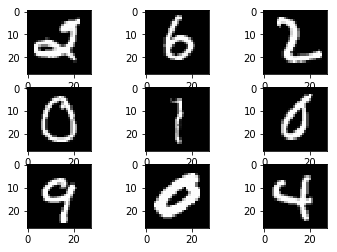

In [4]:
#  Cargando los datos 
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
#K.set_image_dim_ordering('th')

# datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# cambiar a [samples][width][height][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# int a float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# definir la preparacion de los datas 
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit 
datagen.fit(X_train)

# mostrar un batch de imágenes
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # 
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        #print("label: %d" % (y_batch[i]))
        # show 
    pyplot.show()   
    break


#  Blanqueamiento ZCA

Una transformación de blanqueamiento de una imagen es una operación de álgebra lineal que reduce la redundancia en la matriz de imágenes de píxeles. Menos redundancia en la imagen está destinada a resaltar mejor las estructuras y características de la imagen para el algoritmo de aprendizaje. Normalmente, el blanqueamiento de imágenes se realiza mediante la técnica de Análisis de Componentes Principales (PCA). Recientemente, una alternativa llamada ZCA muestra mejores resultados en imágenes transformadas que conservan todas las dimensiones originales y, a diferencia de PCA, las imágenes transformadas aún se parecen a sus originales. Puede realizar una transformación de blanqueo de ZCA usando zca whitening con el argumento en true. 

Al ejecutar el ejemplo, puede ver la misma estructura general en las imágenes y cómo se ha resaltado el contorno de cada dígito.

C:\ProgramData\Anaconda3\envs\tensorgpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


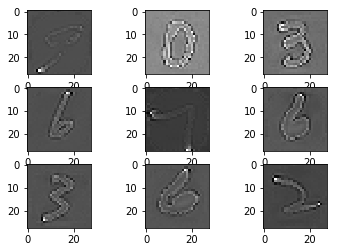

In [5]:
# ZCA whitening

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
#K.set_image_dim_ordering('th')

# datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# [samples][width][height][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# int a float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# preparacion de datos
datagen = ImageDataGenerator(zca_whitening=True)

# fit 
datagen.fit(X_train)

# mostrar un batch
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# 
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show 
    pyplot.show()
    break

#  Rotaciones aleatorias 

A veces, las imágenes en sus datos de muestra pueden tener variaciones y diferentes rotaciones en la escena. Se puede entrenar el modelo para manejar mejor las rotaciones de imágenes girando de forma artificial y aleatoria las imágenes de su conjunto de datos durante el entrenamiento. El siguiente ejemplo crea rotaciones aleatorias de los dígitos MNIST hasta 90 grados al configurar el argumento del rango de rotación.

Al ejecutar el ejemplo, puede ver que las imágenes se han girado a la izquierda y a la derecha hasta un límite de 90 grados. Esto no es útil en este problema porque los dígitos MNIST tienen una orientación normalizada, pero esta transformación puede ser de ayuda cuando se aprende de imágenes donde los objetos pueden tener diferentes orientaciones.

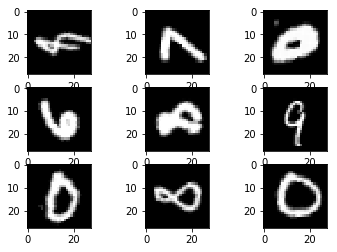

In [6]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
#K.set_image_dim_ordering('th')
# datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# [samples][width][height][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# int a float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# preparacion de los datos
datagen = ImageDataGenerator(rotation_range=90)

# fit 
datagen.fit(X_train)
# ver un batch
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # 
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show 
    pyplot.show()
    break

#  Desplazamientos aleatorios 

Los objetos en las imágenes pueden no estar centrados en la imagen. Pueden estar descentrados en una variedad de formas diferentes. Se puede entrenar la red de aprendizaje profundo para que pueda manejar objetos fuera del centro al crear artificialmente versiones modificadas de sus datos de entrenamiento. Keras admite el desplazamiento aleatorio horizontal y vertical para los datos de entrenamiento usando width_shift_range y height_shift_range

La ejecución de este ejemplo crea versiones desplazadas de los dígitos. Nuevamente, esto no es necesario para MNIST ya que los dígitos escritos a mano ya están centrados, pero puede ver cómo esto podría ser útil en dominios de problemas más complejos.

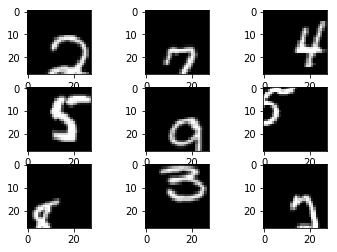

In [9]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
#K.set_image_dim_ordering('th')

# datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# [samples][width][height][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# preparacion de los datos
shift = 0.4
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# fit
datagen.fit(X_train)

# mostrar batch
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # 
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        # 
    pyplot.show()
    break

#  Flips (giros) aleatorios 

Otro aumento de los datos de imagen que puede mejorar el rendimiento en problemas grandes y complejos es crear giros aleatorios de imágenes en los datos de entrenamiento. Keras admite el giro aleatorio a lo largo de los ejes vertical y horizontal utilizando los argumentos de giro horizontal_flip o vertical_flip.

Ejecutando este ejemplo puedes ver los dígitos volteados. Invertir dígitos en MNIST no es útil ya que siempre tendrán la orientación correcta hacia la izquierda y hacia la derecha, pero esto puede ser útil para problemas con imágenes de objetos en una escena que pueden tener una orientación variada.

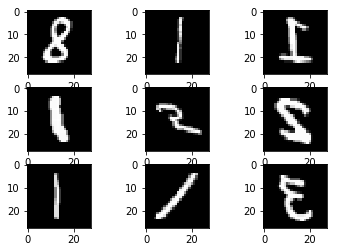

In [10]:
# flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
#K.set_image_dim_ordering('th')

# datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# [samples][width][height][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# preparacion de los datos
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit 
datagen.fit(X_train)
# 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # 
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # 
    pyplot.show()
    break

#  Guardando los datos aumentados

La preparación y el aumento de los datos se realiza en línea por Keras. Esto es eficiente en términos de memoria, pero es posible que necesite las imágenes exactas utilizadas durante el entrenamiento. Por ejemplo, tal vez le gustaría usarlos con un paquete de software diferente más adelante o solo generarlos una vez y usarlos en múltiples modelos o configuraciones de aprendizaje profundo diferentes. Keras te permite guardar las imágenes generadas durante el entrenamiento. El directorio, el prefijo de nombre de archivo y el tipo de archivo de imagen se pueden especificar a la función flow () antes de entrenar. Luego, durante el entrenamiento, las imágenes generadas se escribirán en un archivo. El siguiente ejemplo demuestra esto y escribe 9 imágenes en un subdirectorio de imágenes con el prefijo "img" y el tipo de archivo PNG.



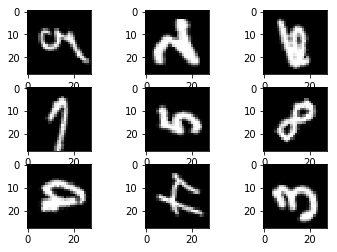

In [12]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
import os
import shutil
#K.set_image_dim_ordering('th')

# datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# [samples][width][height][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# preparacion de los datos
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)

# crear directorio
#os.makedirs('images')
outdir = 'images_ejemplo'
if os.path.exists(outdir):
    shutil.rmtree(outdir)
os.mkdir(outdir)

# mostrar y guardar un batch
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images_ejemplo', save_prefix='img', save_format='png'):
    # 
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show 
    pyplot.show()
    break

        


#  Guardando los datos aumentados ejemplo CIFAR

Se mostrará como almacenar datos aumentados de otra base de datos llamada CIFAR. Dependiendo del tamaño del batch se almacenarán las imagenes. 


In [24]:
# save images 
import os
import shutil
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator


batch_size = 32

# CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train /= 255.0
#X_test /= 255.0


outdir = 'images_ejemplo'


datagen = ImageDataGenerator(rotation_range=90, rescale=1./255) # proceso de aumentation
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, batch_size, save_to_dir=outdir, save_prefix='img', save_format='jpeg')
batch = g.next()
#print(batch)




#  Creando una función para mostrar y guardar imágenes aumentadas

En esta ocasión la funcion de dibujar imágenes utiliza una carpeta temporal para realizar la aumentación de datos y luego guarda una figura con 9 imágenes aumentadas. 


(252, 255, 3)
(1, 252, 255, 3)


C:\ProgramData\Anaconda3\envs\tensorgpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:355: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


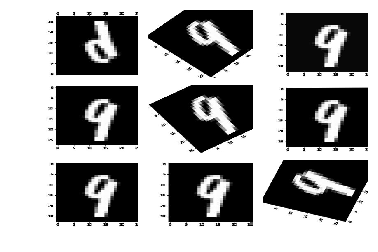

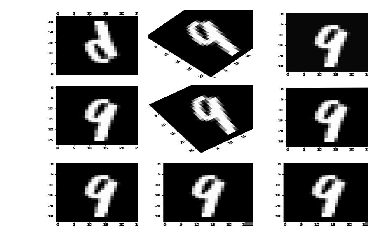

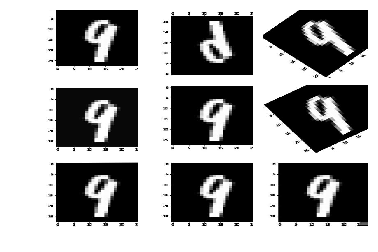

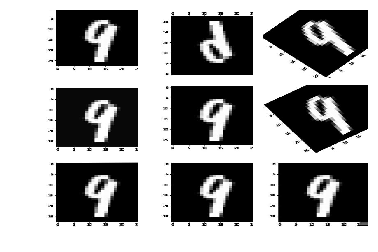

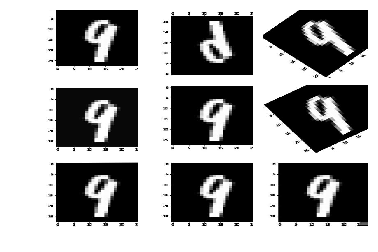

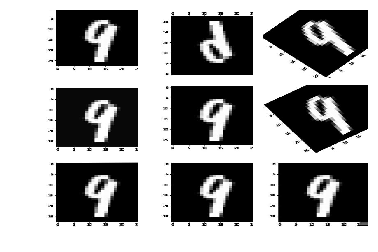

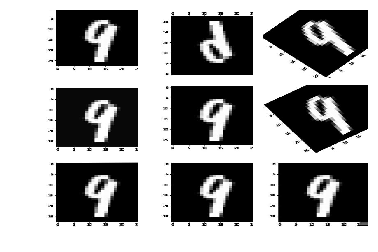

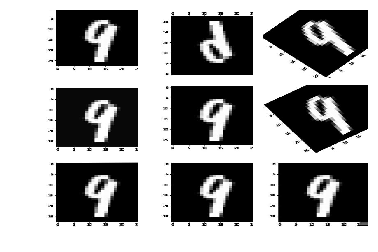

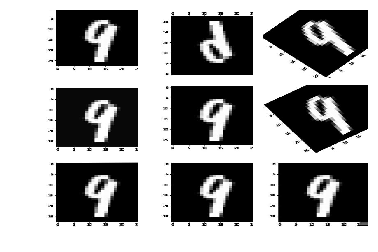

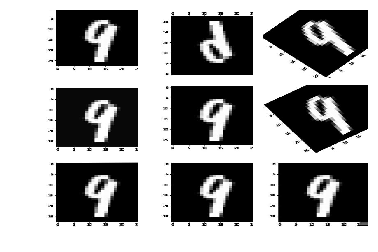

In [37]:
import os
import glob
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

IMAGE_FILE = "C:/Users/Gabriel/Desktop/Práctica/output_11_1.jpg"

def dibujar_imagenes(datagen, x, result_images):
    
    temp_dir = "temp"
    #os.mkdir(temp_dir)
   
    g = datagen.flow(x, batch_size=1, save_to_dir=temp_dir, save_prefix='img', save_format='jpg')
    for i in range(9):
        batch = g.next()

    images = glob.glob(os.path.join(temp_dir, "*.jpg"))
    fig = plt.figure()
    gs = gridspec.GridSpec(3, 3)
    gs.update(wspace=0.1, hspace=0.1)
    
    for i in range(9):
        img = load_img(images[i])
        plt.subplot(gs[i])
        plt.imshow(img, aspect='auto')
        plt.axis("off")
    plt.savefig(result_images)

    # (eliminar directorio)
    # shutil.rmtree(temp_dir)

img = load_img(IMAGE_FILE)

# numpy array（row, col, channel)
x = img_to_array(img)
print(x.shape)

# （sample, row, col, channel)
x = np.expand_dims(x, axis=0)
print(x.shape)

datagen = ImageDataGenerator(rotation_range=90)
dibujar_imagenes(datagen, x, "result_rotation.jpg")

datagen = ImageDataGenerator(width_shift_range=0.2)
dibujar_imagenes(datagen, x, "result_width_shift.jpg")

datagen = ImageDataGenerator(height_shift_range=0.2)
dibujar_imagenes(datagen, x, "result_height_shift.jpg")

datagen = ImageDataGenerator(shear_range=0.78)  # pi/4
dibujar_imagenes(datagen, x, "result_shear.jpg")

datagen = ImageDataGenerator(zoom_range=0.5)
dibujar_imagenes(datagen, x, "result_zoom.jpg")

datagen = ImageDataGenerator(channel_shift_range=100)
dibujar_imagenes(datagen, x, "result_channel_shift.jpg")

datagen = ImageDataGenerator(horizontal_flip=True)
dibujar_imagenes(datagen, x, "result_horizontal_flip.jpg")

datagen = ImageDataGenerator(vertical_flip=True)
dibujar_imagenes(datagen, x, "result_vertical_flip.jpg")

datagen = ImageDataGenerator(samplewise_center=True)
dibujar_imagenes(datagen, x, "result_samplewise_center.jpg")

datagen = ImageDataGenerator(samplewise_std_normalization=True)
dibujar_imagenes(datagen, x, "result_samplewise_std_normalization.jpg")

# Cargando imágenes del disco para realizar aumento de datos

Found 5 images belonging to 1 classes.


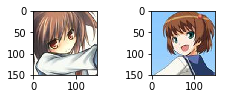

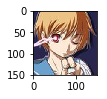

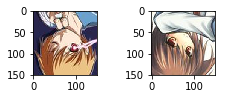

In [146]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from keras.preprocessing.image import ImageDataGenerator

img_rows, img_cols = 150, 150
batch_size = 2
base_dir = './img/'
#x_dir = os.path.join(base_dir, 'x')
x_dir = base_dir
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True )

generador = datagen.flow_from_directory(x_dir, target_size=(img_rows, img_cols), batch_size=batch_size)

batch = generador.next()
imagenes = batch[0]

for j in range(0, len(generador)):
    batch = generador.next()
    imagenes = batch[0] # batch[o ] imagenes batch[1] etiquetas
    for i in range(0, len(imagenes)):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(imagenes[i, :, :, :])
    
    pyplot.show()
    # show 
       

